In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df2 = pd.read_csv('../data/datos_limpios.csv')

In [4]:
df = pd.read_csv('../data/allinone.csv')

In [5]:
# Agarramos un sample de la base para solo trabajar con ~100K registros en vez de la totalidad de los datos

df_sample = df.sample(n=100_000, random_state=42)

### Exploracion inicial

In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1833849 to 2032572
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    100000 non-null  int64  
 1    Destination Port             100000 non-null  int64  
 2    Flow Duration                100000 non-null  int64  
 3    Total Fwd Packets            100000 non-null  int64  
 4    Total Backward Packets       100000 non-null  int64  
 5   Total Length of Fwd Packets   100000 non-null  int64  
 6    Total Length of Bwd Packets  100000 non-null  int64  
 7    Fwd Packet Length Max        100000 non-null  int64  
 8    Fwd Packet Length Min        100000 non-null  int64  
 9    Fwd Packet Length Mean       100000 non-null  float64
 10   Fwd Packet Length Std        100000 non-null  float64
 11  Bwd Packet Length Max         100000 non-null  int64  
 12   Bwd Packet Length Min        100000 non-n

In [7]:
df_sample.describe(include='all')

c:\Users\rocpa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\rocpa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.00000,100000.000000,100000.000000,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81723
mean,1.539634e+06,8474.378650,1.467131e+07,12.011710,14.186330,5.442318e+02,2.367194e+04,209.38595,19.000010,58.075009,...,-1.651527e+03,7.817118e+04,4.050826e+04,1.490305e+05,5.486419e+04,8.071568e+06,4.981524e+05,8.445513e+06,7.677904e+06,NaN
std,8.875056e+05,18908.854582,3.355229e+07,1019.798209,1401.101469,6.364722e+03,3.001108e+06,688.90347,58.061398,177.213171,...,3.751448e+05,6.731442e+05,3.691718e+05,1.027853e+06,6.094967e+05,2.326103e+07,4.546768e+06,2.399731e+07,2.298866e+07,NaN
min,2.700000e+01,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,...,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,7.733018e+05,53.000000,1.690000e+02,1.000000,1.000000,1.200000e+01,4.000000e+00,6.00000,0.000000,6.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,1.537558e+06,80.000000,3.290150e+04,2.000000,2.000000,6.400000e+01,1.320000e+02,38.00000,6.000000,35.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,2.311854e+06,443.000000,3.215010e+06,5.000000,4.000000,2.800000e+02,5.112500e+02,168.00000,37.000000,51.000000,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


### VISUALIZACIÓN DE LOS DATOS CON SEABORN 


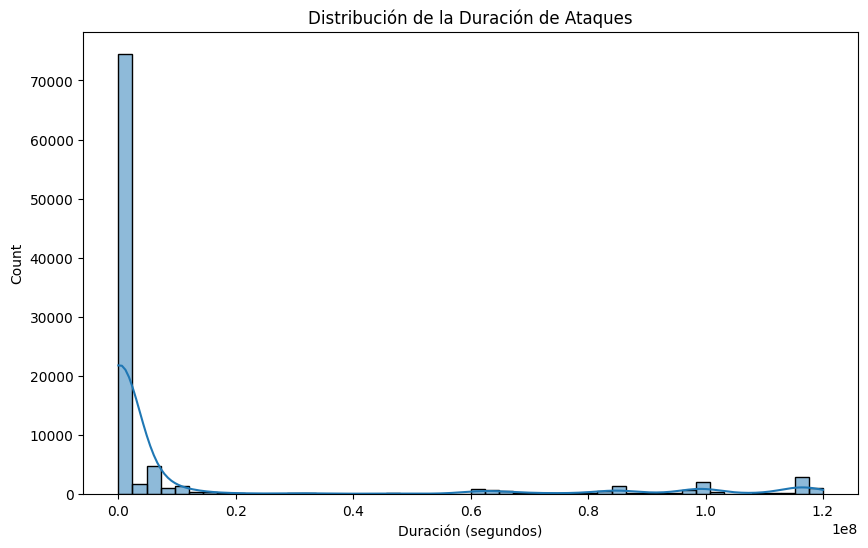

In [8]:
# Ejemplo 1: Histograma con bins ajustados
plt.figure(figsize=(10, 6))
sns.histplot(df_sample[' Flow Duration'], bins=50, kde=True)
plt.title('Distribución de la Duración de Ataques')
plt.xlabel('Duración (segundos)')
plt.show()

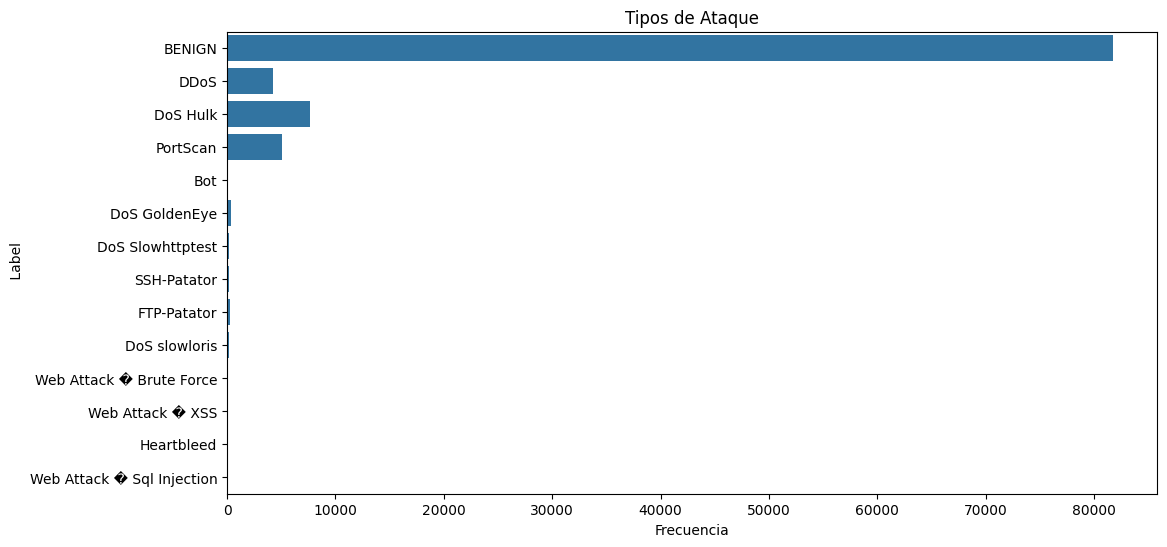

In [9]:
# Top 10 categorías para evitar saturación
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sample, y=df_sample[' Label'])
plt.title('Tipos de Ataque')
plt.xlabel('Frecuencia')
plt.show()

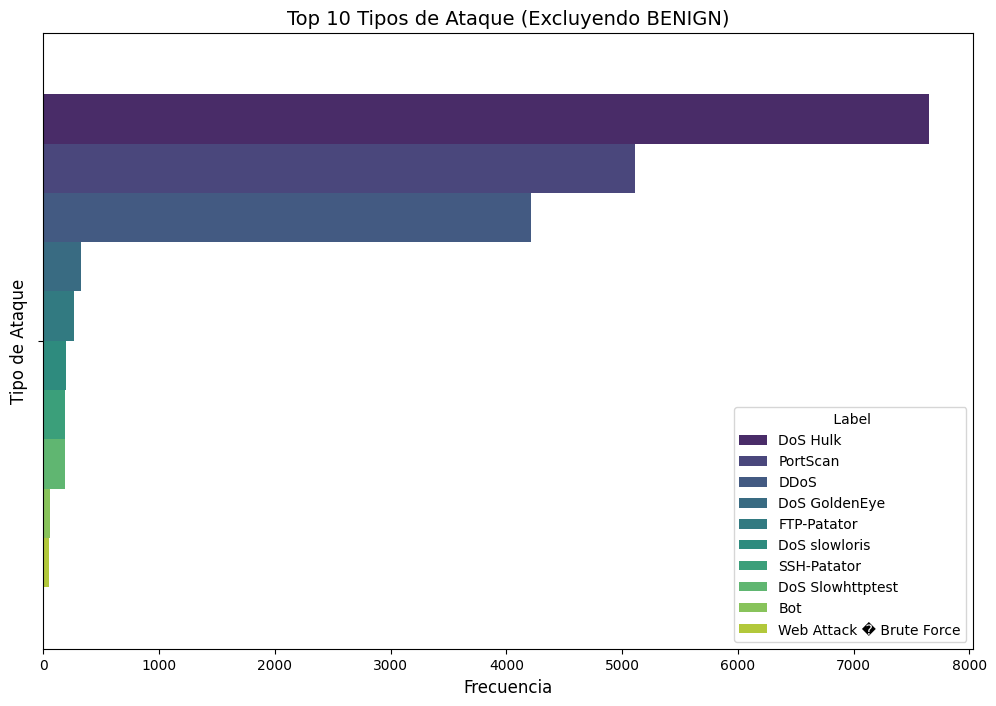

In [10]:

df_ataques = df_sample[df_sample[' Label'] != 'BENIGN']

# Contar frecuencias de cada tipo de ataque
top_ataques = df_ataques[' Label'].value_counts().nlargest(10)

# Gráfico de barras horizontales (más legible)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ataques.values, hue=top_ataques.index, palette='viridis')
plt.title('Top 10 Tipos de Ataque (Excluyendo BENIGN)', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Ataque', fontsize=12)
plt.show()

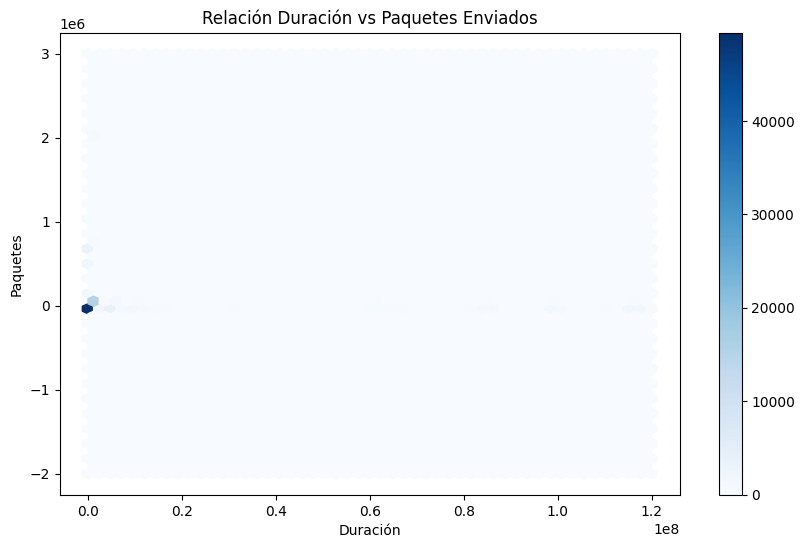

In [11]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    df_sample[' Flow Duration'], 
    df_sample[' Flow Packets/s'], 
    gridsize=50, 
    cmap='Blues'
)
plt.colorbar()
plt.title('Relación Duración vs Paquetes Enviados')
plt.xlabel('Duración')
plt.ylabel('Paquetes')
plt.show()

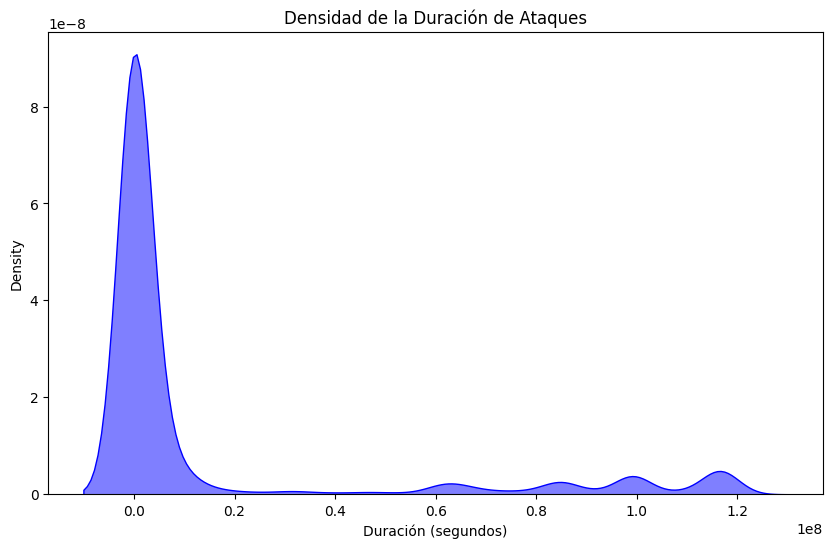

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    df_sample[' Flow Duration'], 
    fill=True, 
    color='blue', 
    alpha=0.5
)
plt.title('Densidad de la Duración de Ataques')
plt.xlabel('Duración (segundos)')
plt.show()

In [13]:
print(df.columns)

Index(['Unnamed: 0', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Lengt

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['Packet Length Mean'], kde=True, bins=50)
plt.title('Mediana de tamaño de paquetes')
plt.xlabel('Packet lenght mean')
plt.ylabel('Tamaño')
plt.show()

KeyError: 'Packet Length Mean'

<Figure size 1000x600 with 0 Axes>

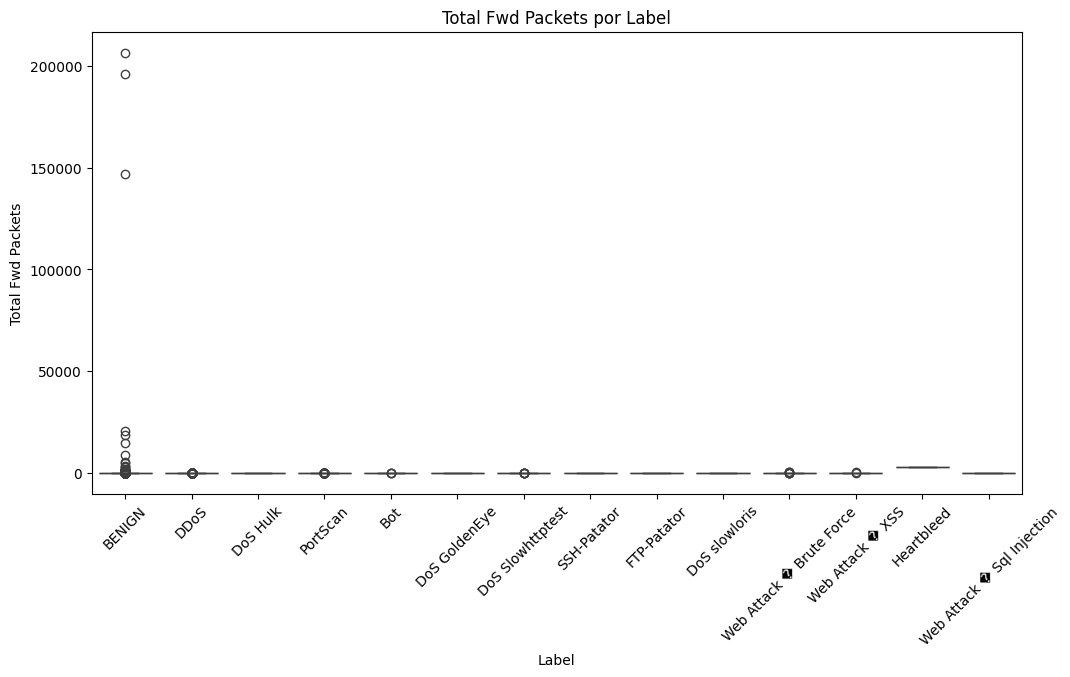

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=' Label', y=' Total Fwd Packets', data=df_sample)
plt.title('Total Fwd Packets por Label')
plt.xlabel('Label')
plt.ylabel('Total Fwd Packets')
plt.xticks(rotation=45)
plt.show()


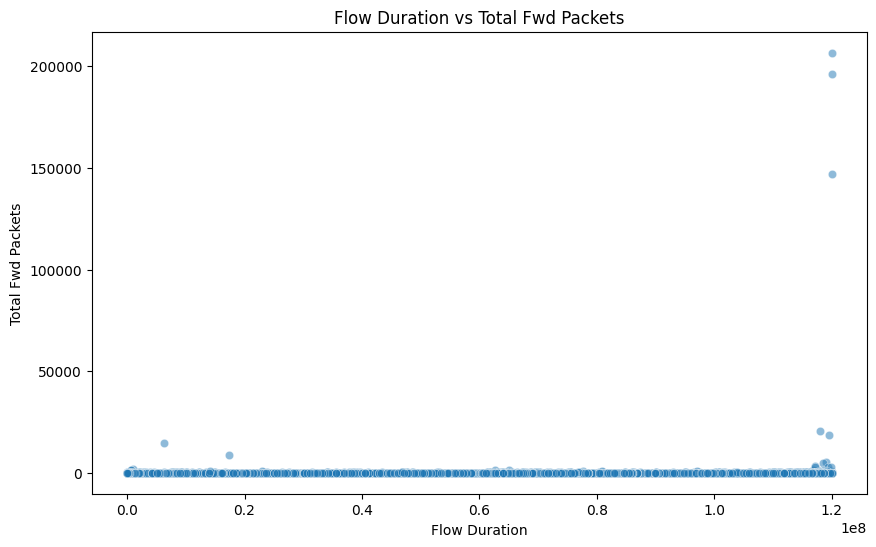

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Flow Duration', y=' Total Fwd Packets', data=df_sample, alpha=0.5)
plt.title('Flow Duration vs Total Fwd Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()


In [ ]:
subset_cols = [' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', ' Packet Length Mean']
sns.pairplot(df_sample[subset_cols])
plt.show()

NameError: name 'sns' is not defined